# Homework Set 11

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Problem 1:

* Applying the forward Euler's scheme to the second order ODE:

$$
y'' + (\lambda+1)y' + \lambda y = 0, \;\; y(0) = 1, \;\; y'(0) = \lambda - 2, \;\; \lambda >> 1.
$$

Rewrite it as a system of first order ODEs. Find the region of absolute stability. (Hint: find the eigen value decomposition of the coefficient matrix, and the region of absolute stability is the domain where the step size is chosen so that each eigen value satifies the condition for the 1D ODE.)
     
   

## Solution:

The second order ODE can be rewritten as:

$$
\renewcommand{bs}{\boldsymbol}
\renewcommand{by}{\boldsymbol{y}}
\renewcommand{bf}{\boldsymbol{f}}
$$
$$
\begin{matrix}
\left[
\begin{matrix}
y \\
v \\
\end{matrix}
\right]^{'} =  \left[
\begin{matrix}
v \\
-(\lambda+1)v - \lambda y \\
\end{matrix}
\right] = \left[
\begin{matrix}
0&1\\
-\lambda&-(\lambda+1)\\
\end{matrix}
\right] \left[
\begin{matrix}
y \\
v \\
\end{matrix}
\right], ~~~~~ y(0) = 1, ~z(0) = \lambda -2
\end{matrix}
$$

To show the region of absolute stability, we first calculate the eigen values of the above coefficient matrix:

$Ax = \lambda_i x$  

Which gives us two eigen values $\lambda_1 = -1$, $\lambda_2 = -\lambda$

Then, plug these two values into the corresponding conditions:

$ \left| 1 + h\lambda_i \right| < 1$

We got:

$0 < h < 2 $, and $ 0 < h < \frac{2}{\lambda}$

Since $\lambda >> 1$, the region of absolute stability is:

$0< h < \frac{2}{\lambda}$

## Problem 2:

* Build a python program based on "odeint" to solve the above ODE for different $\lambda $ values. Provide at least two cases that show  different behavior of the solution based on the stiffness of the problem.
     
   

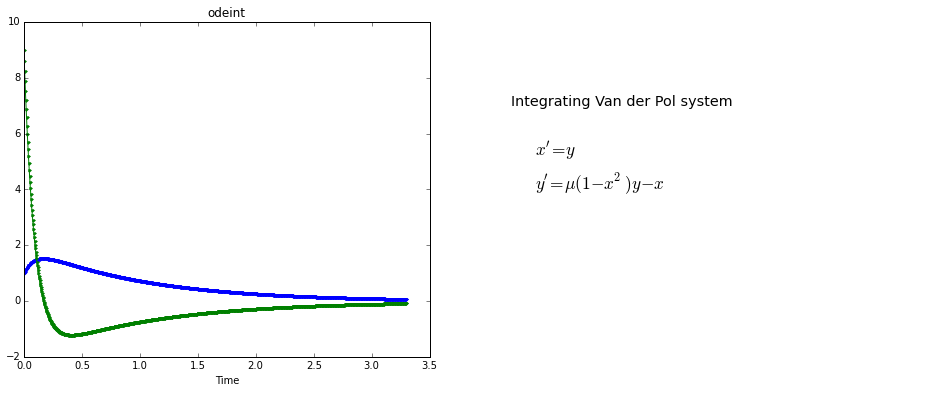

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

lbd = 11
def f(y,t):
    #return [y[1], (1 - y[0]*y[0])*y[1] - y[0]]
    return [y[1], -(lbd+1)*y[1] - lbd*y[0]]

# initial value
y0 = [1.0, lbd-2]
#y0 = [lbd-2, 1.0]
n = 1000
T = 0.3*lbd
h = T/n
ts = np.arange(0.0001,T, h)
ys = odeint(f, y0, ts)
   
fig = plt.figure(figsize=(16,6))
ax =  fig.add_subplot(1, 2, 1)
ax.plot(ts, ys[:, :], '.-')  
#ax.set_ylim([-5, 5])
plt.xlabel('Time')
plt.title('odeint')

ax = fig.add_subplot(122)
ax.set_axis_off()
ax.text(0, .5, "$\;\; y' = \mu (1-x^2)y - x$ ", size="xx-large");
ax.text(0, .6, "$\;\; x' = y$", size="xx-large");
ax.text(0, .75, "Integrating Van der Pol system", size="x-large");

plt.show()


In [22]:
2./lbd

0.02

In [21]:
T

0.3

In [7]:
h

0.03